# Cross-validation

#### Import packages, import data, split data into train/test

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

#### Cross-validation Techniques
We'll be trying 3 different cross-validation techniques
1. `cross_val_score`
2. `KFold`
3. `RepeatedStratifiedKFold`

*Note* When an integer is passed to the cv parameter of cross_val_score():
* `StratifiedKFold` is used if the estimator is a classifier and y is either binary or multiclass.
* In all other cases, `KFold` is used.

**Stratified KFolds ensure class balance across folds**

The key parameter here is `cv` - the number of cross-validation folds

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [15]:
cv = cross_val_score(KNeighborsClassifier(),
                     X_train, y_train, cv=5)
print(cv)

[0.97818182 0.98897059 0.98141264 0.97368421 0.98113208]


In [12]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [16]:
kfold = cross_val_score(KNeighborsClassifier(),
                        X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print(kfold)

[0.96296296 1.         0.97777778 0.97777778 0.97037037 0.99259259
 0.99259259 1.         0.98507463 0.99253731]


In [18]:
rptd_strat_kfold = cross_val_score(KNeighborsClassifier(),
                                   X_train, y_train,
                                   cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42))

print(rptd_strat_kfold)

[0.9929078  0.98561151 0.95620438 0.99259259 0.98507463 0.97761194
 1.         0.96969697 0.99236641 1.         0.9787234  0.97841727
 0.99270073 0.97037037 1.         0.99253731 0.9924812  0.98484848
 0.98473282 0.96946565 0.9929078  0.98561151 0.99270073 0.98518519
 0.98507463 0.99253731 0.97744361 0.99242424 0.98473282 0.98473282
 0.9929078  0.99280576 1.         0.97037037 0.98507463 0.97014925
 0.97744361 0.99242424 0.99236641 0.98473282 0.97163121 0.99280576
 0.99270073 1.         0.98507463 0.98507463 0.97744361 0.97727273
 0.97709924 0.99236641 0.9858156  0.98561151 0.98540146 1.
 0.96268657 1.         0.98496241 0.96212121 0.98473282 0.99236641
 0.97163121 0.98561151 1.         0.98518519 0.99253731 0.99253731
 0.98496241 1.         0.97709924 0.97709924 0.9929078  0.97122302
 0.99270073 1.         0.98507463 0.98507463 0.98496241 1.
 0.98473282 0.98473282 0.97163121 0.97122302 0.99270073 0.98518519
 0.99253731 0.98507463 0.98496241 0.98484848 1.         0.98473282
 0.9787234 

In [19]:
print(f'mean score of plain cv:   {np.mean(cv)}')
print(f'mean score of kfold cv:   {np.mean(kfold)}')
print(f'mean score of rptd_kf cv: {np.mean(rptd_strat_kfold)}')

mean score of plain cv:   0.9806762663640661
mean score of kfold cv:   0.985168601437258
mean score of rptd_kf cv: 0.98559755195736


Grid Searches
=================

We can bake grid search directly into cross-validation techniques.

Here, we'll use `GridSearchCV` on a Support Vector Machine:

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define parameter grid:
* `C` is the error term (the larger the `C` the smaller the margin of the hyperplane. A smaller `C` will undoubtedly introduce some misclassification)
* `gamma` is the kernel coefficient (a small `gamma` will give you low bias and high variance ie overfit while a large `gamma` will give you higher bias and low variance ie underfit.)

In [23]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [24]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3)

A GridSearchCV object behaves just like a normal classifier.

In [25]:
grid_search.fit(X_train, y_train)

C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.109, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.109, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.110, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ............... C=0.001, gamma=0.0001, score=0.109, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.109, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.110, total=   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................ C=0.001, gamma=0.001, score=0.109, total=   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................ C=0.001, gamma=0.001, score=0.109, total=   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................ C=0.001, gamma=0.001, score=0.110, total=   0.2s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................. C=0.001, gamma=0.01, score=0.109, total=   0.2s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .

[CV] ................. C=10.0, gamma=1e-05, score=0.944, total=   0.1s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.976, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.993, total=   0.0s
[CV] C=10.0, gamma=0.0001 ............................................
[CV] ................ C=10.0, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.989, total=   0.1s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.998, total=   0.1s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.984, total=   0.1s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
                         'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
             verbose=3)

In [26]:
grid_search.predict(X_test)

array([0, 4, 7, 4, 8, 4, 9, 2, 4, 6, 6, 7, 2, 8, 7, 2, 5, 3, 3, 8, 5, 2,
       9, 1, 3, 1, 8, 3, 6, 1, 2, 7, 8, 7, 1, 3, 2, 9, 4, 2, 3, 2, 1, 1,
       7, 2, 3, 9, 4, 9, 9, 6, 3, 0, 4, 0, 5, 0, 5, 7, 3, 0, 3, 9, 5, 8,
       1, 6, 3, 2, 1, 3, 6, 9, 2, 9, 5, 9, 3, 1, 7, 9, 0, 5, 2, 8, 1, 9,
       5, 5, 0, 7, 9, 3, 1, 4, 8, 3, 9, 9, 4, 6, 3, 8, 4, 1, 5, 1, 6, 3,
       2, 8, 0, 7, 5, 8, 9, 0, 3, 8, 0, 8, 5, 2, 8, 5, 4, 3, 3, 9, 1, 1,
       3, 5, 3, 5, 8, 1, 1, 8, 6, 3, 2, 5, 5, 4, 2, 3, 7, 9, 6, 1, 7, 0,
       2, 1, 0, 2, 0, 7, 6, 2, 3, 5, 1, 6, 7, 7, 6, 6, 9, 2, 2, 9, 9, 5,
       3, 0, 5, 5, 7, 7, 7, 8, 9, 9, 1, 7, 1, 2, 6, 8, 4, 1, 9, 3, 3, 2,
       9, 5, 9, 5, 7, 1, 2, 5, 7, 3, 3, 4, 5, 3, 0, 4, 8, 9, 1, 3, 8, 7,
       7, 6, 9, 3, 9, 8, 8, 0, 9, 1, 3, 6, 6, 0, 8, 5, 7, 7, 6, 3, 4, 7,
       8, 1, 0, 4, 7, 9, 2, 7, 6, 7, 5, 2, 5, 5, 2, 0, 8, 9, 5, 4, 5, 1,
       0, 3, 8, 9, 3, 5, 0, 7, 4, 1, 5, 0, 2, 3, 2, 3, 9, 1, 2, 1, 0, 6,
       5, 5, 4, 7, 5, 2, 3, 5, 9, 7, 1, 2, 8, 1, 2,

In [27]:
grid_search.score(X_test, y_test)

0.9866666666666667

In [28]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

In [29]:
grid_search.best_score_

0.9903489235337788

In [30]:
grid_search.best_estimator_

SVC(C=10.0, gamma=0.001)

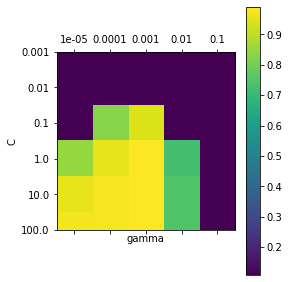

In [31]:
# We extract just the scores

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

# Exercises
Use GridSearchCV to adjust n_neighbors of KNeighborsClassifier.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# testing 1-10 neighbors (as we're looking for digits)
KNN_param_grid = {'n_neighbors': np.arange(1,11)}

KNN_grid_search = GridSearchCV(KNeighborsClassifier(), KNN_param_grid, cv=5, 
                               scoring='accuracy', verbose=3)

KNN_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.989, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.985, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.989, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.981, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.985, total=   0.0s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.985, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.982, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.981, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.977, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.981, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.993, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.989, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy', verbose=3)

In [43]:
KNN_grid_search.score(X_test, y_test)

0.9844444444444445

In [44]:
KNN_grid_search.best_params_

{'n_neighbors': 1}

In [46]:
KNN_grid_search.best_score_

0.985894580549369

In [47]:
# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)
KNN_param_grid = {'n_neighbors': np.arange(1,11),
                  'weights': ['uniform', 'distance']}

KNN_grid_search = GridSearchCV(KNeighborsClassifier(), KNN_param_grid, cv=5, 
                               scoring='accuracy', verbose=3)

KNN_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.989, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.985, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.989, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.981, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.985, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.989, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.985, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.989, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.981, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.985, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.985, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.982, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] .

[CV] ...... n_neighbors=7, weights=uniform, score=0.985, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.978, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.993, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.978, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.966, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.985, total=   0.0s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] ...... n_neighbors=8, weights=uniform, score=0.978, total=   0.0s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [48]:
KNN_grid_search.score(X_test, y_test)

0.9844444444444445

In [49]:
KNN_grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [51]:
KNN_grid_search.best_score_

0.985894580549369

Looks like the default `uniform` weight option was the best - womp.

## Solution

C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best parameters: {'n_neighbors': 1}
Training set accuracy: 1.0
Test set accuracy: 0.9844444444444445


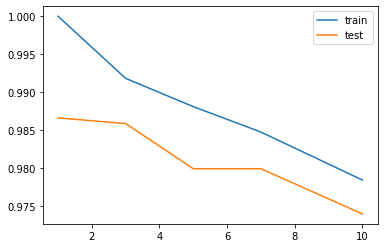

In [53]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 10]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                    return_train_score=True)
grid.fit(X_train, y_train)

print("best parameters: %s" % grid.best_params_)
print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))
results = grid.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_train_score'], label="train")
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], label="test")
plt.legend()